In [8]:
import pandas as pd

In [9]:
import geopandas as gpd

In [10]:
from shapely.geometry import Point

In [11]:
import matplotlib.pyplot as plt

## File Öffnen

In [12]:
gdf_zh = gpd.read_file('stadtkreis/Stadtkreis.shp')
gdf_zh.head(5)

,knr,kname,geometry
0,7,Kreis 7,"POLYGON ((2683860.979 1246723.697, 2683862.124..."
1,11,Kreis 11,"POLYGON ((2684316.434 1250651.586, 2684301.897..."
2,9,Kreis 9,"POLYGON ((2680390.466 1248340.821, 2680389.532..."
3,2,Kreis 2,"POLYGON ((2682296.566 1247016.328, 2682356.984..."
4,10,Kreis 10,"POLYGON ((2680537.632 1249894.533, 2680532.138..."


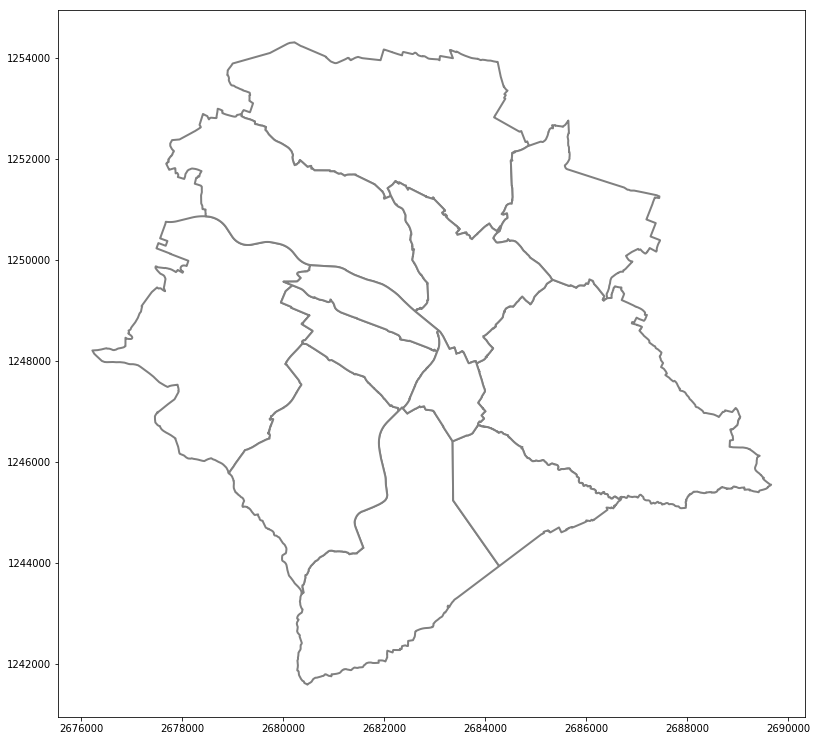

In [13]:
gdf_zh.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))

## Plot

In [114]:
df = pd.read_excel('Koordinaten_Beispiel_Feuerwehr 2.xlsx')

In [118]:
list1 = df[['CoordLong', 'CoordLat', 'MarkerColour']]

In [120]:
list1.head()

,CoordLong,CoordLat,MarkerColour
0,8.561709,47.36584,red
1,8.484266,47.39166,orange
2,8.531350,47.36629,green
3,8.552046,47.37258,orange
4,8.542793,47.38604,red


In [ ]:
gdf_feuerwehr_m = gdf_zh.merge(df5, how="inner", left_on="CoordLong", right_on="CoordLat")

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [28]:
stadtkreise = gpd.read_file("stadtkreis/Stadtkreis.shp")

In [29]:
stadtkreise.head()

,knr,kname,geometry
0,7,Kreis 7,"POLYGON ((2683860.979 1246723.697, 2683862.124..."
1,11,Kreis 11,"POLYGON ((2684316.434 1250651.586, 2684301.897..."
2,9,Kreis 9,"POLYGON ((2680390.466 1248340.821, 2680389.532..."
3,2,Kreis 2,"POLYGON ((2682296.566 1247016.328, 2682356.984..."
4,10,Kreis 10,"POLYGON ((2680537.632 1249894.533, 2680532.138..."


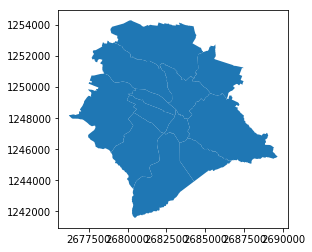

In [30]:
stadtkreise.plot()

In [97]:
# Go into the crs to convert it...
# ignore the datum and spheroid,
# just change the PROJECTION to MERCATOR
# stadtkreise.to_crs({'proj': 'merc'}).plot()

In [103]:
df = pd.read_excel("Koordinaten_Feuerwehr.xlsx")
df.head(2)

,Zahl,Adresse,Hausnummer,PLZ,longitude,latitude,Mehr als 10,weniger als 10,MarkerColour
0,1,Streulistrasse,23,8032,8.561709,47.36584,True,True,red
1,2,Hohlstrasse,623,8048,8.484266,47.39166,True,False,orange


In [104]:
# def make_point(row):
#     return Point(row.longitude, row.latitude)

# # Go through every row, and make a point out of its lat and lon
# points = df.apply(make_point, axis=1)

# # Make a new GeoDataFrame
# # using the data from our old df
# # but also adding in the geometry we just made
# earthquakes = gpd.GeoDataFrame(df, geometry=points)

# # It doesn't come with a CRS because it's a CSV, so let's
# # say "hey, let's use the standard shape of the earth etc"
# earthquakes.crs = {'init': 'epsg:4326'}

# # Let's look at the first few
# earthquakes.head()

In [105]:
# earthquakes.plot()

In [106]:
# Read in the CSV
df = pd.read_excel("Koordinaten_Feuerwehr.xlsx")

points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
earthquakes = gpd.GeoDataFrame(df, geometry=points)
earthquakes.crs = {'init': 'epsg:4326'}

# earthquakes.crs = {'init': 'epsg:4326'}

# If you want to know how this all works, look above
earthquakes.head(2)

,Zahl,Adresse,Hausnummer,PLZ,longitude,latitude,Mehr als 10,weniger als 10,MarkerColour,geometry
0,1,Streulistrasse,23,8032,8.561709,47.36584,True,True,red,POINT (8.561709 47.36584)
1,2,Hohlstrasse,623,8048,8.484266,47.39166,True,False,orange,POINT (8.484266 47.39166)


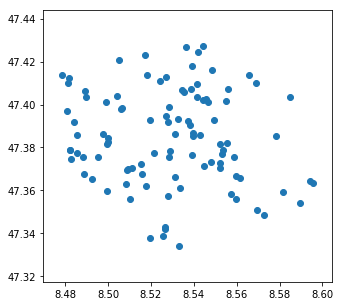

In [107]:
earthquakes.plot(figsize=(20,5))

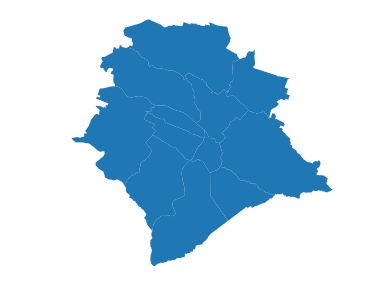

In [111]:
stadtkreise = gpd.read_file('stadtkreis/Stadtkreis.shp')
ax = stadtkreise.plot(figsize=(20,5))
ax.axis('off')
stadtkreise.crs = {'init': 'epsg:4326'}

In [112]:
stadtkreise.crs

{'init': 'epsg:4326'}

In [113]:
earthquakes.crs

{'init': 'epsg:4326'}

(2675552.6381, 2690337.8679, 1240947.9986, 1254942.3394)

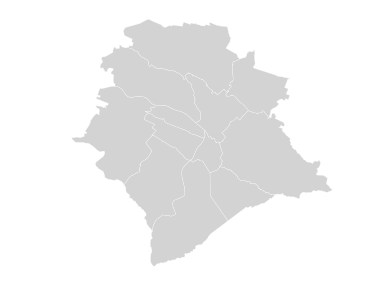

In [115]:
ax = stadtkreise.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
ax.axis('off')

In [116]:
# ax = stadtkreise.to_crs(epsg=3857).plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='pink')
# ax.axis('off')

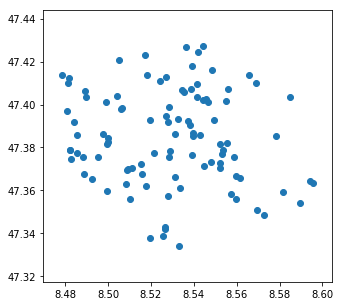

In [117]:
earthquakes.plot(figsize=(20,5))

(8.470946329826978, 8.60298767017302, 47.323114483395536, 47.43835551660447)

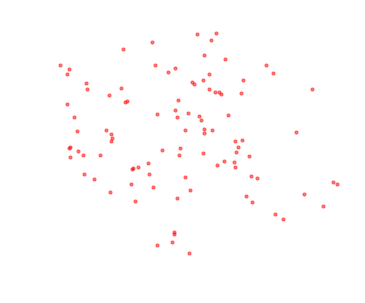

In [118]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

ax = earthquakes.plot(figsize=(20,5), markersize=10, color='red', alpha=0.5)
ax.axis('off')

(-134559.867880482, 2824152.749137166, -62751.090335232184, 1317023.2483969158)

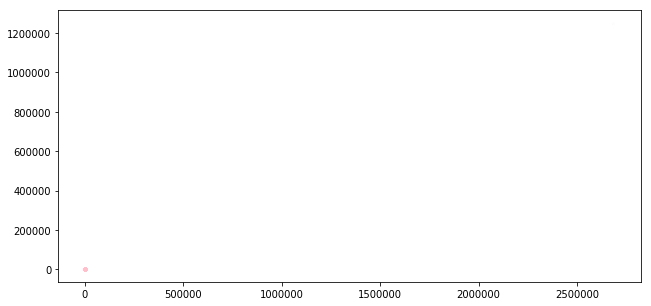

In [120]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = stadtkreise.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,5))
# # Pass ax=ax to the second layer
earthquakes.plot(markersize=10, color='pink', alpha=1, ax=ax)
ax.axis('on')

# earthquakes.plot(figsize=(20,7))

In [88]:
earthquakes.head(2)

,Zahl,Adresse,Hausnummer,PLZ,longitude,latitude,Mehr als 10,weniger als 10,MarkerColour,geometry
0,1,Streulistrasse,23,8032,8.561709,47.36584,True,True,red,POINT (8.561709 47.36584)
1,2,Hohlstrasse,623,8048,8.484266,47.39166,True,False,orange,POINT (8.484266 47.39166)


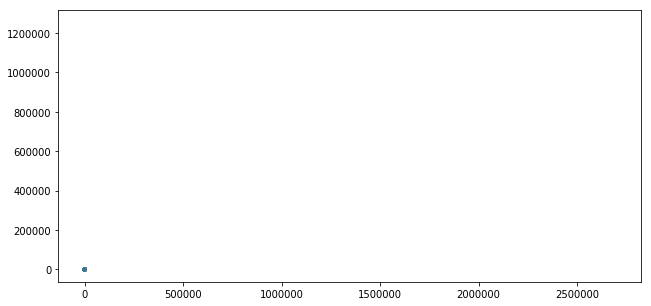

In [89]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = stadtkreise.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='MarkerColour')
# ax.axis('off')

ValueError: Colormap Mehr als 10 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

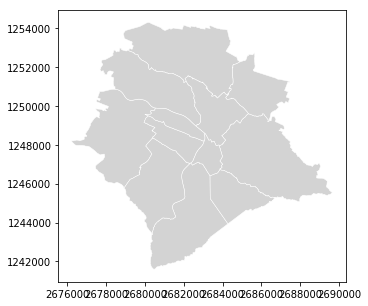

In [90]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='MarkerColour', cmap='Mehr als 10')
ax.axis('off')
